In [48]:
import pandas as pd
import os
import plotly.graph_objects as go
import plotly.express as px

In [51]:
ruta_de_archivos = r'C:\Users\rafae\bigData\Dataset de ventas'

archivos = os.listdir(ruta_de_archivos)

dataframes = {}

for archivo in archivos:
    mes = archivo.split('_')[3].split('.')[0]
    ruta_completa = os.path.join(ruta_de_archivos, archivo)
    df = pd.read_csv(ruta_completa)
    df_ventas = df.copy()

    df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors='coerce')
    df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors='coerce')
    df_ventas['ID de Pedido'] = pd.to_numeric(df_ventas['ID de Pedido'], errors='coerce')


    # eliminar filas
    df_ventas = df_ventas[~df_ventas['Cantidad Pedida'].isna()]
    df_ventas = df_ventas[~df_ventas['Precio Unitario'].isna()]
    df_ventas = df_ventas[~df_ventas['ID de Pedido'].isna()]

    # acomodar columnas
    df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int)
    df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(int)
    df_ventas['ID de Pedido'] = df_ventas['ID de Pedido'].astype(int)

    dataframes[mes] = df_ventas

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

dataframes_mes = {}

In [52]:
# ¿Cómo variaron las ventas a lo largo de los diferentes meses?

totales_ventas = []

for mes in meses:
    dataframes_mes = dataframes[mes]
    totales_ventas_mes = dataframes_mes['Cantidad Pedida'].sum()
    totales_ventas.append(totales_ventas_mes)

        # Crear columna de ingresos totales
    dataframes_mes['Ingreso Total'] = dataframes_mes['Cantidad Pedida'] * dataframes_mes['Precio Unitario']
    
    # Sumar el total de ingresos
    ingreso_total_mes = dataframes_mes['Ingreso Total'].sum()
    print(f"Ingreso total para el mes {mes}: ${ingreso_total_mes}")

totales_ventas

fig = go.Figure()

fig.add_trace(go.Bar(
    x = meses,
    y = totales_ventas,
    marker = dict(color=totales_ventas,colorscale= 'RdYlGn')
))

# en fondo negro me gusta mas
fig.update_layout(
    template='plotly_dark'
)

fig.show()

Ingreso total para el mes Enero: $1807060
Ingreso total para el mes Febrero: $2193144
Ingreso total para el mes Marzo: $2796031
Ingreso total para el mes Abril: $3380338
Ingreso total para el mes Mayo: $3130267
Ingreso total para el mes Junio: $2566675
Ingreso total para el mes Julio: $2634571
Ingreso total para el mes Agosto: $2234143
Ingreso total para el mes Septiembre: $2088683
Ingreso total para el mes Octubre: $3719364
Ingreso total para el mes Noviembre: $3183687
Ingreso total para el mes Diciembre: $4597677


In [53]:
ruta_de_archivos = r'C:\Users\rafae\bigData\Dataset de ventas'

# Listar archivos
archivos = os.listdir(ruta_de_archivos)

dataframes = {}

for archivo in archivos:
    mes = archivo.split('_')[3].split('.')[0]
    ruta_completa = os.path.join(ruta_de_archivos, archivo)
    df = pd.read_csv(ruta_completa)
    df_ventas = df.copy()

    df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors='coerce')
    df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors='coerce')
    df_ventas['ID de Pedido'] = pd.to_numeric(df_ventas['ID de Pedido'], errors='coerce')

    # eliminar filas vacías
    df_ventas = df_ventas.dropna(subset=['Cantidad Pedida', 'Precio Unitario', 'ID de Pedido'])

    # Acomodar columnas
    df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int)
    df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(int)
    df_ventas['ID de Pedido'] = df_ventas['ID de Pedido'].astype(int)

    # Convertir 'Fecha de Pedido' a datetime
    df_ventas['Fecha de Pedido'] = pd.to_datetime(df_ventas['Fecha de Pedido'], format='%m/%d/%y %H:%M')

    # Extraer hora
    df_ventas['Hora'] = df_ventas['Fecha de Pedido'].dt.hour

    dataframes[mes] = df_ventas

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

fig = go.Figure()

# Iterar sobre cada mes y agregar una línea al gráfico
for mes in meses:
    df_mes = dataframes[mes]
    
    # Agrupar por hora
    ventas_por_hora = df_mes.groupby('Hora')['ID de Pedido'].count().sort_index()
    

    fig.add_trace(go.Scatter(
        x=ventas_por_hora.index,
        y=ventas_por_hora.values,
        mode='lines+markers',
        name=mes
    ))

fig.update_layout(
    title='Patrón de Ventas por Hora',
    xaxis_title='Hora del Día',
    yaxis_title='Cantidad de Ventas',
    legend_title='Meses',
    template='plotly_dark'
)

fig.show()

In [54]:
# Recorrer cada mes y generar el gráfico de ventas por ciudad
fig = go.Figure()

for mes in meses:
    df_mes = dataframes[mes]

    df_mes['Ingreso Total'] = df_mes['Cantidad Pedida'] * df_mes['Precio Unitario']

    # Extraemos la ciudad de la dirección
    df_mes['Ciudad'] = df_mes['Dirección de Envio'].apply(lambda x: x.split(',')[1].strip())

    # Agrupar las ventas por ciudad
    ventas_por_ciudad = df_mes.groupby('Ciudad')['Ingreso Total'].sum().sort_values(ascending=False)

    # Añadir barra al gráfico
    fig.add_trace(go.Bar(
        x=ventas_por_ciudad.index[:10],
        y=ventas_por_ciudad.values[:10],
        name=mes
    ))

# Configuración del gráfico
fig.update_layout(
    title='Ventas por ciudad',
    xaxis_title='Ciudad',
    yaxis_title='Ingreso Total',
    barmode='group',
    template='plotly_dark'
)

fig.show()

In [55]:
ventas_productos_global = pd.DataFrame()

for mes in meses:
    df_mes = dataframes[mes]
    
    # Agrupamos por producto
    ventas_producto_mes = df_mes.groupby('Producto')['Cantidad Pedida'].sum().reset_index()
    ventas_producto_mes['Mes'] = mes
    
    # Acumulamos las ventas de productos de cada mes
    ventas_productos_global = pd.concat([ventas_productos_global, ventas_producto_mes], axis=0)

# Agrupamos todos los productos por nombre para obtener el total vendido por producto
ventas_totales_productos = ventas_productos_global.groupby('Producto')['Cantidad Pedida'].sum().sort_values(ascending=False)

# sacar los 10 productos más vendidos
top_10_productos = ventas_totales_productos.head(10).index

# Filtrar el DataFrame global para los 10 productos más vendidos
ventas_productos_global_top10 = ventas_productos_global[ventas_productos_global['Producto'].isin(top_10_productos)]

fig = go.Figure()

# Añadir una barra para cada mes
for mes in meses:
    ventas_mes = ventas_productos_global_top10[ventas_productos_global_top10['Mes'] == mes]
    fig.add_trace(go.Bar(
        x=ventas_mes['Producto'],
        y=ventas_mes['Cantidad Pedida'],
        name=mes
    ))

# diseño del grafico
fig.update_layout(
    title='Top 10 Productos Más Vendidos por Mes',
    xaxis_title='Producto',
    yaxis_title='Cantidad Vendida',
    barmode='stack',
    xaxis_tickangle=-45,
    template='plotly_dark'
)

fig.show()

In [29]:
fig = go.Figure()

# hice mi propia paleta de colores para cada mes
colores_mes = {
    'Enero': 'red',
    'Febrero': 'blue',
    'Marzo': 'green',
    'Abril': 'purple',
    'Mayo': 'orange',
    'Junio': 'pink',
    'Julio': 'brown',
    'Agosto': 'yellow',
    'Septiembre': 'teal',
    'Octubre': 'gray',
    'Noviembre': 'white',
    'Diciembre': 'cyan'
}

for mes in meses:
    df_mes = dataframes[mes]
    
    # Extraemos el día de la semana
    df_mes['Día de la Semana'] = df_mes['Fecha de Pedido'].dt.day_name()
    
    # Agrupar por día de la semana
    ventas_por_dia = df_mes.groupby('Día de la Semana')['Ingreso Total'].sum()
    
    # Asegurar el orden correcto de los días
    dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ventas_por_dia = ventas_por_dia.reindex(dias_ordenados)
    
    # trazar las lineas
    fig.add_trace(go.Scatter(
        x=ventas_por_dia.index,
        y=ventas_por_dia.values,
        mode='lines+markers',
        name=mes,
        line=dict(color=colores_mes[mes])  # Asignamos el color específico al mes
    ))

fig.update_layout(
    title='Tendencia de Ventas por Día de la Semana para Todos los Meses',
    xaxis_title='Día de la Semana',
    yaxis_title='Ingresos Totales',
    legend_title='Meses',
    template='plotly_dark'
)

fig.show()

In [44]:
# Fechas de eventos especiales (solo un evento por mes)
eventos_especiales = {
    '4 de Julio': '07/04/19',
    'Día de Martin Luther King Jr.': '01/21/19',
    'Día de los Presidentes': '02/18/19',
    'Día de Colón': '10/14/19',
    'Día de los Veteranos': '11/11/19',
    'Halloween': '10/31/19',
    'Super Bowl': '02/03/19',
    'Acción de Gracias': '11/28/19',
    'Navidad': '12/25/19'
}

# Concatenar todos los meses en un DataFrame
df_concatenado = pd.concat([dataframes[mes] for mes in meses], ignore_index=True)

df_concatenado['Fecha de Pedido'] = df_concatenado['Fecha de Pedido'].dt.date

ventas_por_dia = df_concatenado.groupby('Fecha de Pedido')['Ingreso Total'].sum().reset_index()

# Crear un gráfico de líneas
fig = px.line(ventas_por_dia, x='Fecha de Pedido', y='Ingreso Total', title='Ventas Diarias a lo Largo del Año')

# Añadir anotaciones para los eventos especiales
for evento, fecha in eventos_especiales.items():
    fecha_evento = pd.to_datetime(fecha, format='%m/%d/%y').date()  # Convertir la fecha a formato datetime
    ventas_evento = ventas_por_dia[ventas_por_dia['Fecha de Pedido'] == fecha_evento]  # Buscar las ventas en esa fecha
    if not ventas_evento.empty:  # Si existen ventas en esa fecha, añadir anotación
        fig.add_annotation(
            x=fecha_evento,
            y=ventas_evento['Ingreso Total'].values[0],
            text=evento,
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-40
        )

fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Ingreso Total',
    template='plotly_dark'
)

fig.show()




C:\Users\rafae\AppData\Local\Temp\ipykernel_5332\1767262230.py:12: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



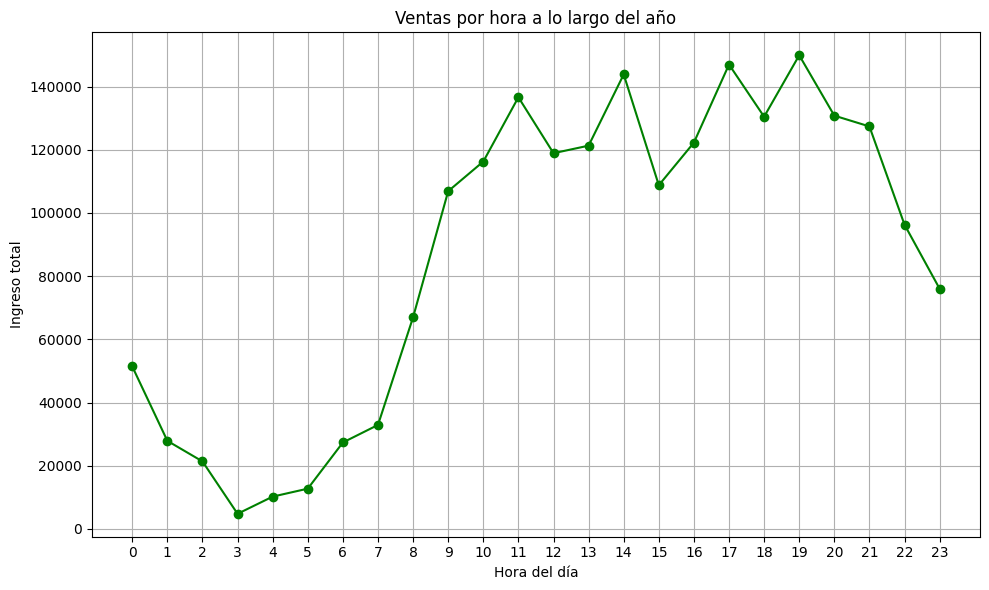

KeyError: 'Diciembre'

<Figure size 1000x600 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt

# Crear una nueva columna 'Ingreso' si no está creada previamente
for mes in dataframes_mes:
    if 'Ingreso' not in dataframes_mes[mes].columns:
        dataframes_mes[mes]['Ingreso'] = dataframes_mes[mes]['Cantidad Pedida'] * dataframes_mes[mes]['Precio Unitario']

# Calcular las ventas por hora
ventas_por_hora_total = pd.DataFrame()

for mes, df in dataframes_mes.items():
    df['Hora'] = pd.to_datetime(df['Fecha de Pedido']).dt.hour
    ventas_por_hora = df.groupby('Hora')['Ingreso'].sum()
    ventas_por_hora_total[mes] = ventas_por_hora

# Calcular el total de ventas por hora a lo largo de todo el año
ventas_por_hora_total['Total'] = ventas_por_hora_total.sum(axis=1)

# Visualizar las ventas por hora
plt.figure(figsize=(10,6))
plt.plot(ventas_por_hora_total.index, ventas_por_hora_total['Total'], marker='o', linestyle='-', color='g')
plt.title('Ventas por hora a lo largo del año')
plt.xlabel('Hora del día')
plt.ylabel('Ingreso total')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Visualizar ventas por hora en algunos meses clave (ej: Diciembre y Julio)
plt.figure(figsize=(10,6))
plt.plot(ventas_por_hora_total.index, ventas_por_hora_total['Diciembre'], marker='o', linestyle='-', color='r', label='Diciembre')
plt.plot(ventas_por_hora_total.index, ventas_por_hora_total['Julio'], marker='o', linestyle='-', color='b', label='Julio')
plt.title('Comparación de ventas por hora en Diciembre y Julio')
plt.xlabel('Hora del día')
plt.ylabel('Ingreso total')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()
# Agrupar las ventas por hora para cada mes
ventas_por_hora = {}

for mes, df in dataframes_mes.items():
    df['Hora'] = pd.to_datetime(df['Fecha de Pedido']).dt.hour
    ventas_por_hora[mes] = df.groupby('Hora')['Ingreso'].sum()

# Crear un DataFrame con los datos de ventas por hora para todos los meses
ventas_hora_df = pd.DataFrame(ventas_por_hora)

# Visualizar los patrones de ventas por hora a lo largo del año
plt.figure(figsize=(12,8))

for mes in meses:
    if mes in ventas_hora_df.columns:
        plt.plot(ventas_hora_df.index, ventas_hora_df[mes], label=mes)

plt.title('Patrones de ventas por hora a lo largo del año')
plt.xlabel('Hora del día')
plt.ylabel('Ingreso total')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()